<a href="https://colab.research.google.com/github/PurpleGrace/Deep_Learning_Tools_Image_Classification/blob/main/Deep_Learning_Project_Tool_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dotenv

ERROR: Could not find a version that satisfies the requirement dotenv (from versions: 0.0.1, 0.0.2, 0.0.4, 0.0.5)
ERROR: No matching distribution found for dotenv


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.preprocessing import image


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
load_dotenv()
filepath = os.getenv('FILEPATH')

In [ ]:
filepath = '/Users/kristy/Documents/Data Science Material/Metis/6 Deep Learning/Deep Learning Project/Mechanical Tools Image dataset'
filepath = 'Mechanical Tools Image dataset'
labels = os.listdir(filepath)
os.walk(directory)

['Gasoline Can',
 'Hammer',
 '.DS_Store',
 'Screw Driver',
 'Wrench',
 'Rope',
 'Pebbels',
 'Toolbox',
 'pliers']

Use the link code as reference to loop over files [code](https://github.com/crystal-ctrl/deep_learning_project/blob/main/workflow/1_EDA.ipynb)

In [ ]:
dataset = {'image_path':[],'category':[]}
for category in os.listdir(filepath):
    if category != '.DS_Store':
        print(category)
        for image in os.listdir(filepath +"/"+category):
            if image != '.DS_Store':
                dataset['image_path'].append(filepath +"/"+category+"/"+ image)
                dataset['category'].append(category)
dataset = pd.DataFrame(dataset)    
dataset.head()

Gasoline Can
Hammer
Screw Driver
Wrench
Rope
Pebbels
Toolbox
pliers


,image_path,category
0,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can
1,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can
2,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can
3,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can
4,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can


In [ ]:
dataset.shape,dataset.describe()

((7525, 2),
                                                image_path      category
 count                                                7525          7525
 unique                                               7525             8
 top     Mechanical Tools Image dataset/Gasoline Can/Ga...  Screw Driver
 freq                                                    1          1969)

<BarContainer object of 8 artists>

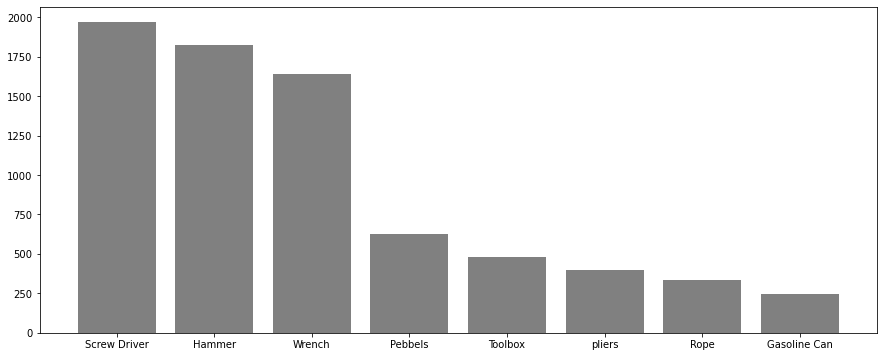

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(dataset.category.value_counts().index,dataset.category.value_counts(),color = 'gray')

### Transfering image to array

In [ ]:
def img_to_array(img_path):
    img=  keras.preprocessing.image.load_img(img_path,target_size=[224,224])
    x = keras.preprocessing.image.img_to_array(img)
    return x

In [ ]:
X_digit = []
for img in dataset.image_path:
    X_digit.append(img_to_array(img))

Mechanical Tools Image dataset/Gasoline Can/GasolineCan175.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan161.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan149.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan83.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan97.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan203.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan68.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan217.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan40.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan54.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan55.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan41.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan216.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan69.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan202.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan96.jpg
M

Mechanical Tools Image dataset/Gasoline Can/GasolineCan67.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan230.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan224.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan225.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan231.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan66.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan219.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan72.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan99.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan153.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan147.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan190.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan184.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan192.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan186.jpg
Mechanical Tools Image dataset/Gasoline Can/GasolineCan179.

Mechanical Tools Image dataset/Hammer/Hammer856.JPEG
Mechanical Tools Image dataset/Hammer/Hammer505.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1467.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1037.JPEG
Mechanical Tools Image dataset/Hammer/Hammer328.jpg
Mechanical Tools Image dataset/Hammer/Hammer786.JPEG
Mechanical Tools Image dataset/Hammer/Hammer300.jpg
Mechanical Tools Image dataset/Hammer/Hammer769.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1522.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1172.JPEG
Mechanical Tools Image dataset/Hammer/Hammer314.jpg
Mechanical Tools Image dataset/Hammer/Hammer1488.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1365.JPEG
Mechanical Tools Image dataset/Hammer/Hammer987.JPEG
Mechanical Tools Image dataset/Hammer/Hammer315.jpg
Mechanical Tools Image dataset/Hammer/Hammer1735.JPEG
Mechanical Tools Image dataset/Hammer/Hammer301.jpg
Mechanical Tools Image dataset/Hammer/Hammer591.JPEG
Mechanical Tools Image dataset/Hammer/Hammer

Mechanical Tools Image dataset/Hammer/Hammer841.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1684.JPEG
Mechanical Tools Image dataset/Hammer/Hammer836.JPEG
Mechanical Tools Image dataset/Hammer/Hammer565.JPEG
Mechanical Tools Image dataset/Hammer/Hammer76.jpg
Mechanical Tools Image dataset/Hammer/Hammer420.JPEG
Mechanical Tools Image dataset/Hammer/Hammer299.jpg
Mechanical Tools Image dataset/Hammer/Hammer973.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1391.JPEG
Mechanical Tools Image dataset/Hammer/Hammer62.jpg
Mechanical Tools Image dataset/Hammer/Hammer709.JPEG
Mechanical Tools Image dataset/Hammer/Hammer89.jpg
Mechanical Tools Image dataset/Hammer/Hammer1811.JPEG
Mechanical Tools Image dataset/Hammer/Hammer266.jpg
Mechanical Tools Image dataset/Hammer/Hammer272.jpg
Mechanical Tools Image dataset/Hammer/Hammer1542.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1112.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1407.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1057.

Mechanical Tools Image dataset/Hammer/Hammer163.jpg
Mechanical Tools Image dataset/Hammer/Hammer1334.JPEG
Mechanical Tools Image dataset/Hammer/Hammer177.jpg
Mechanical Tools Image dataset/Hammer/Hammer485.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1621.JPEG
Mechanical Tools Image dataset/Hammer/Hammer893.JPEG
Mechanical Tools Image dataset/Hammer/Hammer939.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1271.JPEG
Mechanical Tools Image dataset/Hammer/Hammer743.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1158.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1508.JPEG
Mechanical Tools Image dataset/Hammer/Hammer188.jpg
Mechanical Tools Image dataset/Hammer/Hammer606.JPEG
Mechanical Tools Image dataset/Hammer/Hammer493.JPEG
Mechanical Tools Image dataset/Hammer/Hammer539.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1322.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1772.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1288.JPEG
Mechanical Tools Image dataset/Hammer/Ham

Mechanical Tools Image dataset/Hammer/Hammer206.jpg
Mechanical Tools Image dataset/Hammer/Hammer1817.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1401.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1051.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1285.JPEG
Mechanical Tools Image dataset/Hammer/Hammer867.JPEG
Mechanical Tools Image dataset/Hammer/Hammer534.JPEG
Mechanical Tools Image dataset/Hammer/Hammer471.JPEG
Mechanical Tools Image dataset/Hammer/Hammer888.JPEG
Mechanical Tools Image dataset/Hammer/Hammer922.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1790.JPEG
Mechanical Tools Image dataset/Hammer/Hammer758.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1143.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1513.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1006.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1456.JPEG
Mechanical Tools Image dataset/Hammer/Hammer488.JPEG
Mechanical Tools Image dataset/Hammer/Hammer522.JPEG
Mechanical Tools Image dataset/Hammer/

Mechanical Tools Image dataset/Hammer/Hammer370.jpg
Mechanical Tools Image dataset/Hammer/Hammer416.jpg
Mechanical Tools Image dataset/Hammer/Hammer914.JPEG
Mechanical Tools Image dataset/Hammer/Hammer447.JPEG
Mechanical Tools Image dataset/Hammer/Hammer502.JPEG
Mechanical Tools Image dataset/Hammer/Hammer851.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1319.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1749.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1067.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1437.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1821.JPEG
Mechanical Tools Image dataset/Hammer/Hammer693.JPEG
Mechanical Tools Image dataset/Hammer/Hammer166.jpg
Mechanical Tools Image dataset/Hammer/Hammer739.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1122.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1572.JPEG
Mechanical Tools Image dataset/Hammer/Hammer172.jpg
Mechanical Tools Image dataset/Hammer/Hammer1088.JPEG
Mechanical Tools Image dataset/Hammer/Hamm

Mechanical Tools Image dataset/Hammer/Hammer1005.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1455.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1140.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1510.JPEG
Mechanical Tools Image dataset/Hammer/Hammer464.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1785.JPEG
Mechanical Tools Image dataset/Hammer/Hammer937.JPEG
Mechanical Tools Image dataset/Hammer/Hammer183.jpg
Mechanical Tools Image dataset/Hammer/Hammer872.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1290.JPEG
Mechanical Tools Image dataset/Hammer/Hammer521.JPEG
Mechanical Tools Image dataset/Hammer/Hammer197.jpg
Mechanical Tools Image dataset/Hammer/Hammer1443.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1013.JPEG
Mechanical Tools Image dataset/Hammer/Hammer608.JPEG
Mechanical Tools Image dataset/Hammer/Hammer168.jpg
Mechanical Tools Image dataset/Hammer/Hammer140.jpg
Mechanical Tools Image dataset/Hammer/Hammer1506.JPEG
Mechanical Tools Image dataset/Hammer/Ham

Mechanical Tools Image dataset/Hammer/Hammer1792.JPEG
Mechanical Tools Image dataset/Hammer/Hammer473.JPEG
Mechanical Tools Image dataset/Hammer/Hammer536.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1287.JPEG
Mechanical Tools Image dataset/Hammer/Hammer865.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1403.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1053.JPEG
Mechanical Tools Image dataset/Hammer/Hammer648.JPEG
Mechanical Tools Image dataset/Hammer/Hammer226.jpg
Mechanical Tools Image dataset/Hammer/Hammer1815.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1546.JPEG
Mechanical Tools Image dataset/Hammer/Hammer232.jpg
Mechanical Tools Image dataset/Hammer/Hammer1116.JPEG
Mechanical Tools Image dataset/Hammer/Hammer36.jpg
Mechanical Tools Image dataset/Hammer/Hammer424.JPEG
Mechanical Tools Image dataset/Hammer/Hammer977.JPEG
Mechanical Tools Image dataset/Hammer/Hammer22.jpg
Mechanical Tools Image dataset/Hammer/Hammer1395.JPEG
Mechanical Tools Image dataset/Hammer/Hammer

Mechanical Tools Image dataset/Hammer/Hammer120.jpg
Mechanical Tools Image dataset/Hammer/Hammer435.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1384.JPEG
Mechanical Tools Image dataset/Hammer/Hammer966.JPEG
Mechanical Tools Image dataset/Hammer/Hammer989.JPEG
Mechanical Tools Image dataset/Hammer/Hammer823.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1691.JPEG
Mechanical Tools Image dataset/Hammer/Hammer570.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1042.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1412.JPEG
Mechanical Tools Image dataset/Hammer/Hammer659.JPEG
Mechanical Tools Image dataset/Hammer/Hammer336.jpg
Mechanical Tools Image dataset/Hammer/Hammer1804.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1107.JPEG
Mechanical Tools Image dataset/Hammer/Hammer322.jpg
Mechanical Tools Image dataset/Hammer/Hammer1557.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1740.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1310.JPEG
Mechanical Tools Image dataset/Hammer/Ha

Mechanical Tools Image dataset/Hammer/Hammer287.jpg
Mechanical Tools Image dataset/Hammer/Hammer68.jpg
Mechanical Tools Image dataset/Hammer/Hammer40.jpg
Mechanical Tools Image dataset/Hammer/Hammer455.JPEG
Mechanical Tools Image dataset/Hammer/Hammer906.JPEG
Mechanical Tools Image dataset/Hammer/Hammer54.jpg
Mechanical Tools Image dataset/Hammer/Hammer250.jpg
Mechanical Tools Image dataset/Hammer/Hammer244.jpg
Mechanical Tools Image dataset/Hammer/Hammer1167.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1537.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1022.JPEG
Mechanical Tools Image dataset/Hammer/Hammer83.jpg
Mechanical Tools Image dataset/Hammer/Hammer1472.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1188.JPEG
Mechanical Tools Image dataset/Hammer/Hammer793.JPEG
Mechanical Tools Image dataset/Hammer/Hammer278.jpg
Mechanical Tools Image dataset/Hammer/Hammer97.jpg
Mechanical Tools Image dataset/Hammer/Hammer639.JPEG
Mechanical Tools Image dataset/Hammer/Hammer547.JPEG
Me

Mechanical Tools Image dataset/Hammer/Hammer822.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1690.JPEG
Mechanical Tools Image dataset/Hammer/Hammer571.JPEG
Mechanical Tools Image dataset/Hammer/Hammer118.jpg
Mechanical Tools Image dataset/Hammer/Hammer1444.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1014.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1501.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1151.JPEG
Mechanical Tools Image dataset/Hammer/Hammer124.jpg
Mechanical Tools Image dataset/Hammer/Hammer130.jpg
Mechanical Tools Image dataset/Hammer/Hammer1278.JPEG
Mechanical Tools Image dataset/Hammer/Hammer930.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1782.JPEG
Mechanical Tools Image dataset/Hammer/Hammer1628.JPEG
Mechanical Tools Image dataset/Hammer/Hammer6.jpg
Mechanical Tools Image dataset/Hammer/Hammer463.JPEG
Mechanical Tools Image dataset/Hammer/Hammer526.JPEG
Mechanical Tools Image dataset/Hammer/Hammer875.JPEG
Mechanical Tools Image dataset/Hammer/Hammer

Mechanical Tools Image dataset/Screw Driver/ScrewDriver1813.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver965.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver103.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1669.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1393.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1239.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver117.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1686.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1452.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1002.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver877.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1901.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver498.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver932.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver898.JPEG
Mechanical Tools Image dataset/Scre

Mechanical Tools Image dataset/Screw Driver/ScrewDriver66.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1193.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1039.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1890.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver72.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver73.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver708.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver67.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1384.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1691.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1412.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1042.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver564.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver837.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1941.JPEG
Mechanical Tools Image dataset/Screw Dri

Mechanical Tools Image dataset/Screw Driver/ScrewDriver1849.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver448.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1633.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1263.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver745.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1799.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1776.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver600.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1326.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1408.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver104.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1058.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver987.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver110.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver138.jpg
Mechanical Tools Image dataset/Screw

Mechanical Tools Image dataset/Screw Driver/ScrewDriver646.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1049.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1419.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver996.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver14.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver979.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver28.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver580.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver797.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver29.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver15.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver778.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1874.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver902.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1177.JPEG
Mechanical Tools Image dataset/Screw Driver/

Mechanical Tools Image dataset/Screw Driver/ScrewDriver1770.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1320.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver606.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver399.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver981.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver170.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver164.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver578.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver597.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver158.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1818.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1232.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver714.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1662.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1398.JPEG
Mechanical Tools Image dataset/Screw D

Mechanical Tools Image dataset/Screw Driver/ScrewDriver1196.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver36.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver849.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1895.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver22.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1529.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1179.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1483.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver648.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1694.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver23.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver37.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1381.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver977.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1801.JPEG
Mechanical Tools Image dataset/Screw Dri

Mechanical Tools Image dataset/Screw Driver/ScrewDriver652.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1374.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1724.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver197.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1231.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver717.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver183.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1661.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver653.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1375.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1725.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver187.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1230.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver716.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1660.JPEG
Mechanical Tools Image dataset/Scre

Mechanical Tools Image dataset/Screw Driver/ScrewDriver976.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1800.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1553.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1103.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1416.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver560.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1046.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver833.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1945.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver999.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1695.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver649.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver33.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver27.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1380.JPEG
Mechanical Tools Image dataset/Screw

Mechanical Tools Image dataset/Screw Driver/ScrewDriver603.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1325.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver487.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1630.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver493.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1260.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver746.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver592.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver108.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver984.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver120.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1958.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver134.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1372.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver654.JPEG
Mechanical Tools Image dataset/Screw Dri

Mechanical Tools Image dataset/Screw Driver/ScrewDriver480.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1902.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1451.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver494.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1001.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver319.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1328.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1778.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1282.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1797.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver325.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver443.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver457.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver331.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1851.JPEG
Mechanical Tools Image dataset/Screw Dr

Mechanical Tools Image dataset/Screw Driver/ScrewDriver79.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver638.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1037.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver86.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1467.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1934.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver92.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver842.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1871.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver907.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1172.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1488.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1522.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver535.jpg
Mechanical Tools Image dataset/Screw Driver/ScrewDriver680.JPEG
Mechanical Tools Image dataset/Screw Dri

Mechanical Tools Image dataset/Wrench/Wrench883.JPEG
Mechanical Tools Image dataset/Wrench/Wrench137.jpg
Mechanical Tools Image dataset/Wrench/Wrench616.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1462.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1198.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1032.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1527.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1177.JPEG
Mechanical Tools Image dataset/Wrench/Wrench753.JPEG
Mechanical Tools Image dataset/Wrench/Wrench321.jpg
Mechanical Tools Image dataset/Wrench/Wrench587.JPEG
Mechanical Tools Image dataset/Wrench/Wrench447.jpg
Mechanical Tools Image dataset/Wrench/Wrench453.jpg
Mechanical Tools Image dataset/Wrench/Wrench335.jpg
Mechanical Tools Image dataset/Wrench/Wrench1209.JPEG
Mechanical Tools Image dataset/Wrench/Wrench991.JPEG
Mechanical Tools Image dataset/Wrench/Wrench309.jpg
Mechanical Tools Image dataset/Wrench/Wrench1065.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1

Mechanical Tools Image dataset/Wrench/Wrench1422.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1072.JPEG
Mechanical Tools Image dataset/Wrench/Wrench292.jpg
Mechanical Tools Image dataset/Wrench/Wrench1588.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1567.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1137.JPEG
Mechanical Tools Image dataset/Wrench/Wrench713.JPEG
Mechanical Tools Image dataset/Wrench/Wrench969.JPEG
Mechanical Tools Image dataset/Wrench/Wrench245.jpg
Mechanical Tools Image dataset/Wrench/Wrench523.jpg
Mechanical Tools Image dataset/Wrench/Wrench590.JPEG
Mechanical Tools Image dataset/Wrench/Wrench537.jpg
Mechanical Tools Image dataset/Wrench/Wrench251.jpg
Mechanical Tools Image dataset/Wrench/Wrench279.jpg
Mechanical Tools Image dataset/Wrench/Wrench986.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1286.JPEG
Mechanical Tools Image dataset/Wrench/Wrench509.jpg
Mechanical Tools Image dataset/Wrench/Wrench521.jpg
Mechanical Tools Image dataset/Wrench/Wrench247.

Mechanical Tools Image dataset/Wrench/Wrench1262.JPEG
Mechanical Tools Image dataset/Wrench/Wrench915.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1632.JPEG
Mechanical Tools Image dataset/Wrench/Wrench208.jpg
Mechanical Tools Image dataset/Wrench/Wrench234.jpg
Mechanical Tools Image dataset/Wrench/Wrench552.jpg
Mechanical Tools Image dataset/Wrench/Wrench546.jpg
Mechanical Tools Image dataset/Wrench/Wrench220.jpg
Mechanical Tools Image dataset/Wrench/Wrench780.JPEG
Mechanical Tools Image dataset/Wrench/Wrench550.jpg
Mechanical Tools Image dataset/Wrench/Wrench236.jpg
Mechanical Tools Image dataset/Wrench/Wrench1079.JPEG
Mechanical Tools Image dataset/Wrench/Wrench222.jpg
Mechanical Tools Image dataset/Wrench/Wrench1583.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1429.JPEG
Mechanical Tools Image dataset/Wrench/Wrench544.jpg
Mechanical Tools Image dataset/Wrench/Wrench1096.JPEG
Mechanical Tools Image dataset/Wrench/Wrench718.JPEG
Mechanical Tools Image dataset/Wrench/Wrench962.J

Mechanical Tools Image dataset/Wrench/Wrench435.jpg
Mechanical Tools Image dataset/Wrench/Wrench1629.JPEG
Mechanical Tools Image dataset/Wrench/Wrench353.jpg
Mechanical Tools Image dataset/Wrench/Wrench64.jpg
Mechanical Tools Image dataset/Wrench/Wrench774.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1500.JPEG
Mechanical Tools Image dataset/Wrench/Wrench70.jpg
Mechanical Tools Image dataset/Wrench/Wrench1150.JPEG
Mechanical Tools Image dataset/Wrench/Wrench58.jpg
Mechanical Tools Image dataset/Wrench/Wrench1445.JPEG
Mechanical Tools Image dataset/Wrench/Wrench384.jpg
Mechanical Tools Image dataset/Wrench/Wrench1015.JPEG
Mechanical Tools Image dataset/Wrench/Wrench631.JPEG
Mechanical Tools Image dataset/Wrench/Wrench390.jpg
Mechanical Tools Image dataset/Wrench/Wrench391.jpg
Mechanical Tools Image dataset/Wrench/Wrench385.jpg
Mechanical Tools Image dataset/Wrench/Wrench1202.JPEG
Mechanical Tools Image dataset/Wrench/Wrench59.jpg
Mechanical Tools Image dataset/Wrench/Wrench975.JPEG
M

Mechanical Tools Image dataset/Wrench/Wrench650.JPEG
Mechanical Tools Image dataset/Wrench/Wrench715.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1561.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1131.JPEG
Mechanical Tools Image dataset/Wrench/Wrench596.JPEG
Mechanical Tools Image dataset/Wrench/Wrench557.jpg
Mechanical Tools Image dataset/Wrench/Wrench231.jpg
Mechanical Tools Image dataset/Wrench/Wrench225.jpg
Mechanical Tools Image dataset/Wrench/Wrench1218.JPEG
Mechanical Tools Image dataset/Wrench/Wrench543.jpg
Mechanical Tools Image dataset/Wrench/Wrench980.JPEG
Mechanical Tools Image dataset/Wrench/Wrench219.jpg
Mechanical Tools Image dataset/Wrench/Wrench579.JPEG
Mechanical Tools Image dataset/Wrench/Wrench628.JPEG
Mechanical Tools Image dataset/Wrench/Wrench566.jpg
Mechanical Tools Image dataset/Wrench/Wrench200.jpg
Mechanical Tools Image dataset/Wrench/Wrench782.JPEG
Mechanical Tools Image dataset/Wrench/Wrench214.jpg
Mechanical Tools Image dataset/Wrench/Wrench572.jpg

Mechanical Tools Image dataset/Wrench/Wrench1217.JPEG
Mechanical Tools Image dataset/Wrench/Wrench558.jpg
Mechanical Tools Image dataset/Wrench/Wrench1094.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1581.JPEG
Mechanical Tools Image dataset/Wrench/Wrench202.jpg
Mechanical Tools Image dataset/Wrench/Wrench564.jpg
Mechanical Tools Image dataset/Wrench/Wrench570.jpg
Mechanical Tools Image dataset/Wrench/Wrench216.jpg
Mechanical Tools Image dataset/Wrench/Wrench548.jpg
Mechanical Tools Image dataset/Wrench/Wrench1095.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1580.JPEG
Mechanical Tools Image dataset/Wrench/Wrench212.jpg
Mechanical Tools Image dataset/Wrench/Wrench560.jpg
Mechanical Tools Image dataset/Wrench/Wrench206.jpg
Mechanical Tools Image dataset/Wrench/Wrench1353.JPEG
Mechanical Tools Image dataset/Wrench/Wrench824.JPEG
Mechanical Tools Image dataset/Wrench/Wrench577.JPEG
Mechanical Tools Image dataset/Wrench/Wrench598.JPEG
Mechanical Tools Image dataset/Wrench/Wrench961.J

Mechanical Tools Image dataset/Wrench/Wrench403.jpg
Mechanical Tools Image dataset/Wrench/Wrench365.jpg
Mechanical Tools Image dataset/Wrench/Wrench52.jpg
Mechanical Tools Image dataset/Wrench/Wrench701.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1125.JPEG
Mechanical Tools Image dataset/Wrench/Wrench46.jpg
Mechanical Tools Image dataset/Wrench/Wrench1575.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1060.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1430.JPEG
Mechanical Tools Image dataset/Wrench/Wrench644.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1627.JPEG
Mechanical Tools Image dataset/Wrench/Wrench900.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1277.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1298.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1332.JPEG
Mechanical Tools Image dataset/Wrench/Wrench845.JPEG
Mechanical Tools Image dataset/Wrench/Wrench47.jpg
Mechanical Tools Image dataset/Wrench/Wrench53.jpg
Mechanical Tools Image dataset/Wrench/Wrench402.

Mechanical Tools Image dataset/Wrench/Wrench1323.JPEG
Mechanical Tools Image dataset/Wrench/Wrench854.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1289.JPEG
Mechanical Tools Image dataset/Wrench/Wrench679.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1118.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1548.JPEG
Mechanical Tools Image dataset/Wrench/Wrench696.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1231.JPEG
Mechanical Tools Image dataset/Wrench/Wrench946.JPEG
Mechanical Tools Image dataset/Wrench/Wrench803.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1374.JPEG
Mechanical Tools Image dataset/Wrench/Wrench102.jpg
Mechanical Tools Image dataset/Wrench/Wrench116.jpg
Mechanical Tools Image dataset/Wrench/Wrench680.JPEG
Mechanical Tools Image dataset/Wrench/Wrench950.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1227.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1362.JPEG
Mechanical Tools Image dataset/Wrench/Wrench815.JPEG
Mechanical Tools Image dataset/Wrench/Wr

Mechanical Tools Image dataset/Wrench/Wrench678.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1119.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1549.JPEG
Mechanical Tools Image dataset/Wrench/Wrench697.JPEG
Mechanical Tools Image dataset/Wrench/Wrench910.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1267.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1637.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1322.JPEG
Mechanical Tools Image dataset/Wrench/Wrench855.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1288.JPEG
Mechanical Tools Image dataset/Wrench/Wrench264.jpg
Mechanical Tools Image dataset/Wrench/Wrench502.jpg
Mechanical Tools Image dataset/Wrench/Wrench516.jpg
Mechanical Tools Image dataset/Wrench/Wrench785.JPEG
Mechanical Tools Image dataset/Wrench/Wrench270.jpg
Mechanical Tools Image dataset/Wrench/Wrench258.jpg
Mechanical Tools Image dataset/Wrench/Wrench1139.JPEG
Mechanical Tools Image dataset/Wrench/Wrench1569.JPEG
Mechanical Tools Image dataset/Wrench/Wrenc

Mechanical Tools Image dataset/Rope/Rope16.jpg
Mechanical Tools Image dataset/Rope/Rope117.jpg
Mechanical Tools Image dataset/Rope/Rope103.jpg
Mechanical Tools Image dataset/Rope/Rope1.jpg
Mechanical Tools Image dataset/Rope/Rope261.jpg
Mechanical Tools Image dataset/Rope/Rope275.jpg
Mechanical Tools Image dataset/Rope/Rope249.jpg
Mechanical Tools Image dataset/Rope/Rope248.jpg
Mechanical Tools Image dataset/Rope/Rope274.jpg
Mechanical Tools Image dataset/Rope/Rope260.jpg
Mechanical Tools Image dataset/Rope/Rope102.jpg
Mechanical Tools Image dataset/Rope/Rope116.jpg
Mechanical Tools Image dataset/Rope/Rope17.jpg
Mechanical Tools Image dataset/Rope/Rope328.jpg
Mechanical Tools Image dataset/Rope/Rope300.jpg
Mechanical Tools Image dataset/Rope/Rope314.jpg
Mechanical Tools Image dataset/Rope/Rope302.jpg
Mechanical Tools Image dataset/Rope/Rope316.jpg
Mechanical Tools Image dataset/Rope/Rope15.jpg
Mechanical Tools Image dataset/Rope/Rope29.jpg
Mechanical Tools Image dataset/Rope/Rope100.jp

Mechanical Tools Image dataset/Rope/Rope40.jpg
Mechanical Tools Image dataset/Rope/Rope196.jpg
Mechanical Tools Image dataset/Rope/Rope182.jpg
Mechanical Tools Image dataset/Rope/Rope54.jpg
Mechanical Tools Image dataset/Rope/Rope68.jpg
Mechanical Tools Image dataset/Rope/Rope83.jpg
Mechanical Tools Image dataset/Rope/Rope155.jpg
Mechanical Tools Image dataset/Rope/Rope141.jpg
Mechanical Tools Image dataset/Rope/Rope97.jpg
Mechanical Tools Image dataset/Rope/Rope169.jpg
Mechanical Tools Image dataset/Rope/Rope223.jpg
Mechanical Tools Image dataset/Rope/Rope237.jpg
Mechanical Tools Image dataset/Rope/Rope236.jpg
Mechanical Tools Image dataset/Rope/Rope222.jpg
Mechanical Tools Image dataset/Rope/Rope168.jpg
Mechanical Tools Image dataset/Rope/Rope140.jpg
Mechanical Tools Image dataset/Rope/Rope96.jpg
Mechanical Tools Image dataset/Rope/Rope82.jpg
Mechanical Tools Image dataset/Rope/Rope154.jpg
Mechanical Tools Image dataset/Rope/Rope69.jpg
Mechanical Tools Image dataset/Rope/Rope183.jpg


Mechanical Tools Image dataset/Pebbels/Pebbels557.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels219.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels392.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels386.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels437.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels351.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels64.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels345.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels70.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels423.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels2.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels58.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels379.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels190.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels184.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels153.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels621.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels147.jpg
Mechanical Tools Image dataset/Pe

Mechanical Tools Image dataset/Pebbels/Pebbels480.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels494.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels325.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels10.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels443.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels457.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels331.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels319.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels38.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels127.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels133.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels132.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels126.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels39.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels318.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels456.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels330.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels11.jpg
Mechanical Tools Image dataset/P

Mechanical Tools Image dataset/Pebbels/Pebbels598.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels229.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels201.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels567.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels573.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels215.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels83.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels97.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels349.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels68.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels375.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels40.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels413.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels407.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels361.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels54.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels188.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels611.jpg
Mechanical Tools Image dataset/Pe

Mechanical Tools Image dataset/Toolbox/Toolbox310.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox304.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox462.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox338.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox112.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox106.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox138.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox110.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox104.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox448.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox312.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox474.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox460.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox306.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox299.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox18.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox30.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox266.jpg
Mechanical Tools Image dataset

Mechanical Tools Image dataset/Toolbox/Toolbox418.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox60.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox236.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox74.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox222.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox48.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox49.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox223.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox75.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox237.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox61.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox419.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox431.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox357.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox343.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox425.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox394.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox380.jpg
Mechanical Tools Image dataset/Too

Mechanical Tools Image dataset/Toolbox/Toolbox39.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox11.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox247.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox253.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox252.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox246.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox10.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox38.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox291.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox285.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox440.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox326.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox332.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox454.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox6.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox468.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox124.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox130.jpg
Mechanical Tools Image dataset/Too

Mechanical Tools Image dataset/pliers/Pliers155.jpg
Mechanical Tools Image dataset/pliers/Pliers182.jpg
Mechanical Tools Image dataset/pliers/Pliers196.jpg
Mechanical Tools Image dataset/pliers/Pliers11.jpg
Mechanical Tools Image dataset/pliers/Pliers237.jpg
Mechanical Tools Image dataset/pliers/Pliers223.jpg
Mechanical Tools Image dataset/pliers/Pliers39.jpg
Mechanical Tools Image dataset/pliers/Pliers235.jpg
Mechanical Tools Image dataset/pliers/Pliers221.jpg
Mechanical Tools Image dataset/pliers/Pliers13.jpg
Mechanical Tools Image dataset/pliers/Pliers209.jpg
Mechanical Tools Image dataset/pliers/Pliers180.jpg
Mechanical Tools Image dataset/pliers/Pliers194.jpg
Mechanical Tools Image dataset/pliers/Pliers143.jpg
Mechanical Tools Image dataset/pliers/Pliers157.jpg
Mechanical Tools Image dataset/pliers/Pliers382.jpg
Mechanical Tools Image dataset/pliers/Pliers396.jpg
Mechanical Tools Image dataset/pliers/Pliers341.jpg
Mechanical Tools Image dataset/pliers/Pliers355.jpg
Mechanical Tool

In [ ]:
X_digit = np.array(X_digit)
X_digit.shape

(7525, 224, 224, 3)

In [ ]:
y_digit = dataset.category.astype("category").cat.codes

In [ ]:
category_map = dict(zip(y_digit,dataset.category))
category_map

{0: 'Gasoline Can',
 1: 'Hammer',
 4: 'Screw Driver',
 6: 'Wrench',
 3: 'Rope',
 2: 'Pebbels',
 5: 'Toolbox',
 7: 'pliers'}

In [ ]:
y_digit_hotcode = keras.utils.to_categorical(y_digit)

In [ ]:
y_digit_hotcode.shape

(7525, 8)

### Split data into train and test set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_digit,y_digit,random_state = 17,shuffle =True,test_size =.2)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6020, 224, 224, 3), (6020,), (1505, 224, 224, 3), (1505,))

In [ ]:
Counter(y_train)

Counter({1: 1477, 4: 1537, 5: 399, 6: 1304, 2: 512, 7: 322, 0: 204, 3: 265})

In [ ]:
Counter(y_test)

Counter({4: 432, 1: 349, 6: 339, 5: 83, 2: 117, 7: 75, 3: 70, 0: 40})

In [ ]:
y_train_hotcode = keras.utils.to_categorical(y_train)

### Basic CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

In [ ]:
'''
 In this network structure, note that we follow the typical CNN heuristic of 
 gradually reducing width and height dimenions over time with max pooling
 (typically by a factor of 2), but increasing the filter depth dimension 
 to find increasingly specific patterns. These models are typically compromised 
 of a series of convolutional blocks followed by a flattening operation and 
 a series of fully connected layers at the terminus.
'''

NN = Sequential()

NN.add(InputLayer(input_shape=X_train.shape[1:]))

NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))

NN.add(MaxPooling2D())

NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))

NN.add(MaxPooling2D())


NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

NN.add(GlobalAveragePooling2D())


NN.add(Dense(20, activation='relu'))
NN.add(Dense(8, activation='softmax'))  # 10 target classes

NN.compile(
    loss='categorical_crossentropy',
    #optimizer= keras.optimizers.Adam(learning_rate=0.01),
    optimizer = 'Adam',
    metrics=['accuracy'],
)
NN.summary()
time1 =time.time()
NN.fit(X_train, y_train_hotcode, epochs=5, verbose=1, validation_split=0.25)  # track progress as we fit

time2 = time.time()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 224, 224, 10)      280       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 20)      1820      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 56, 56, 30)        5430      
                                                                 
 global_average_pooling2d_10  (None, 30)             

In [ ]:
total_time = time2-time1
total_time

289.71829080581665

In [ ]:
preds = np.argmax(NN.predict(X_test), axis=1)
accuracy_score(y_test, preds)

0.3009966777408638

### Transfering Learning

In [ ]:
keras_data = keras.utils.image_dataset_from_directory(
    filepath, labels='inferred')


Found 7525 files belonging to 8 classes.


<bound method DatasetV2.get_single_element of <BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>>